# Analyzing and Predicting Player Count Trends in Online Games

## Part 2: Exploratory Data Analysis

Now that we have dataframes that will be easier to analyze and work with, we can complete some EDA. We will be posing different queries and attempt to answer them with constructed visualizations. These queries are:

1. What game had the largest change in players over a defined period (week, month, year)?
2. Of all our dataframes, when is the single largest daily change in player base?
3. Is there a similar trend in the change in players across all games? If not, what does this suggest?
4. How does a larger player base impact volitility in number of players? 
5. How are number of players and viewers distributed?
6. How does an event affect number of players?

In [149]:
# we import necessary libraries

!pip install -U fsds

import statistics as stats
from fsds.imports import * 
from datetime import datetime

Requirement already up-to-date: fsds in c:\users\rmcar\anaconda\envs\learn-env\lib\site-packages (0.2.30)


In [150]:
# we import our dataframes

csgo = pd.read_csv('data/Clean/csgo.csv', parse_dates = ['DateTime'], index_col = 'DateTime')
dota = pd.read_csv('data/Clean/dota.csv', parse_dates = ['DateTime'], index_col = 'DateTime')
rl = pd.read_csv('data/Clean/rl.csv', parse_dates = ['DateTime'], index_col = 'DateTime')
tf = pd.read_csv('data/Clean/tf.csv', parse_dates = ['DateTime'], index_col = 'DateTime')

ls = [csgo, dota, rl, tf]
labels = ['CS:GO', "DOTA 2", 'Rocket League', 'Team Fortress 2']

ls = list(map(lambda df: df.drop(columns = "Unnamed: 0"), ls))

ls[0].info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2195 entries, 2015-01-01 to 2021-01-03
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   players       2195 non-null   int64  
 1   viewers       2195 non-null   int64  
 2   event         2195 non-null   object 
 3   %chg_players  2146 non-null   float64
 4   %chg_viewers  1998 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 102.9+ KB


### 1. Which games had the largest change in players over a week, month, and year?

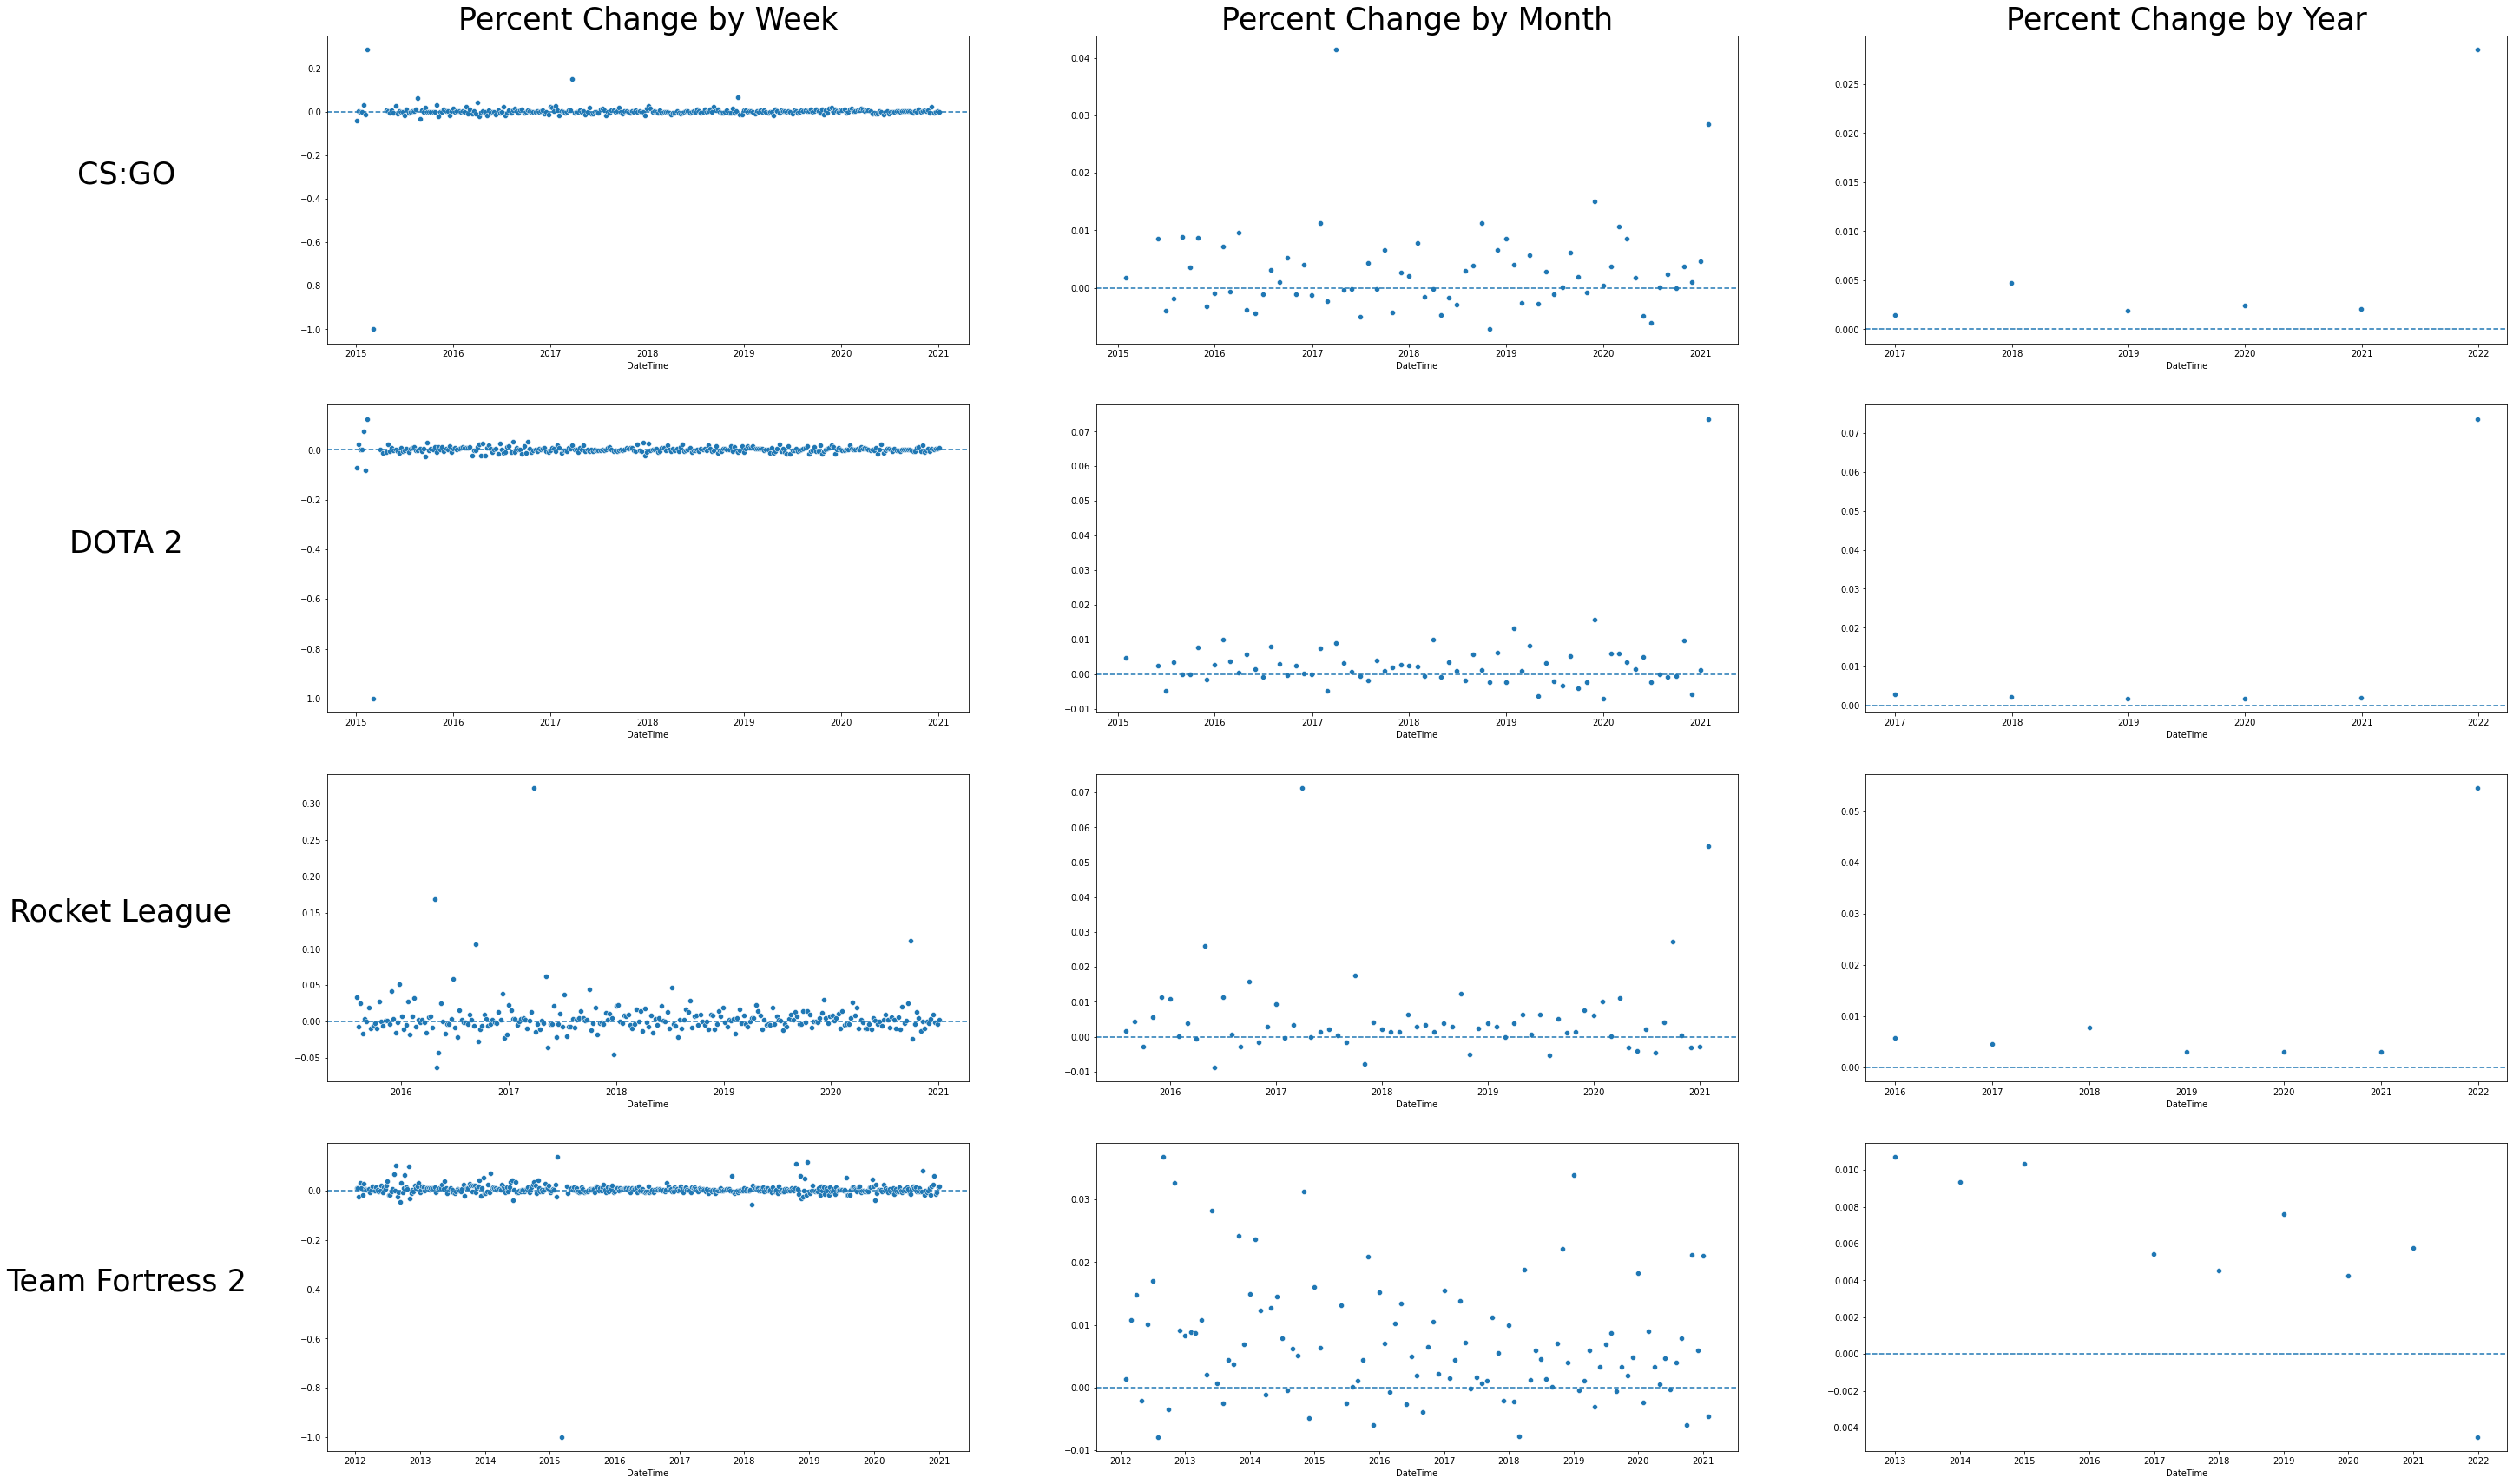

In [151]:
# we currently have daily percent changes, so we will have to calculate rolling averages for the 
# time periods above.

times = ['W', 'M', 'Y']


fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (45, 30))

for i, df in enumerate(ls):
    for x, t  in enumerate(times):
        df_plot = df.groupby(pd.Grouper(level = 'DateTime', freq = t)).mean()
        ax = sns.scatterplot(data = df_plot, x = 'DateTime', y = '%chg_players', ax = axes[i][x])
        ax.axhline(0, ls = '--')
        #ax.set(title = 'Average change in players by ' + t, xlabel = 'Time', ylim = (-0.5, 0.5))
        
game_labels = ['CS:GO', 'DOTA 2', 'Rocket League', 'Team Fortress 2']
time_labels = ['Week', 'Month', 'Year']

for i, game in enumerate(game_labels):
    axes[i][0].set_ylabel(game, fontsize = 35, rotation = 0, labelpad = 200)
    axes[i][1].set(ylabel = '')
    axes[i][2].set(ylabel = '')
    
    
for i, time in enumerate(time_labels):
    axes[0][i].set_title('Percent Change by '+time, fontsize = 35)
    axes[1][i].set(title = '')
    axes[2][i].set(title = '')
    axes[3][i].set(title = '')


In [152]:
ls[0]

,players,viewers,event,%chg_players,%chg_viewers
DateTime,,,,,
2015-01-01,443188,0,No,NaN,NaN
2015-01-02,383943,0,No,-0.133679,NaN
2015-01-03,398639,0,No,0.038277,NaN
2015-01-04,389040,0,No,-0.024079,NaN
2015-01-05,376364,0,No,-0.032583,NaN
...,...,...,...,...,...
2020-12-30,1056057,77815,No,0.021949,-0.075634
2020-12-31,982583,60120,No,-0.069574,-0.227398
2021-01-01,1020715,91532,No,0.038808,0.522488


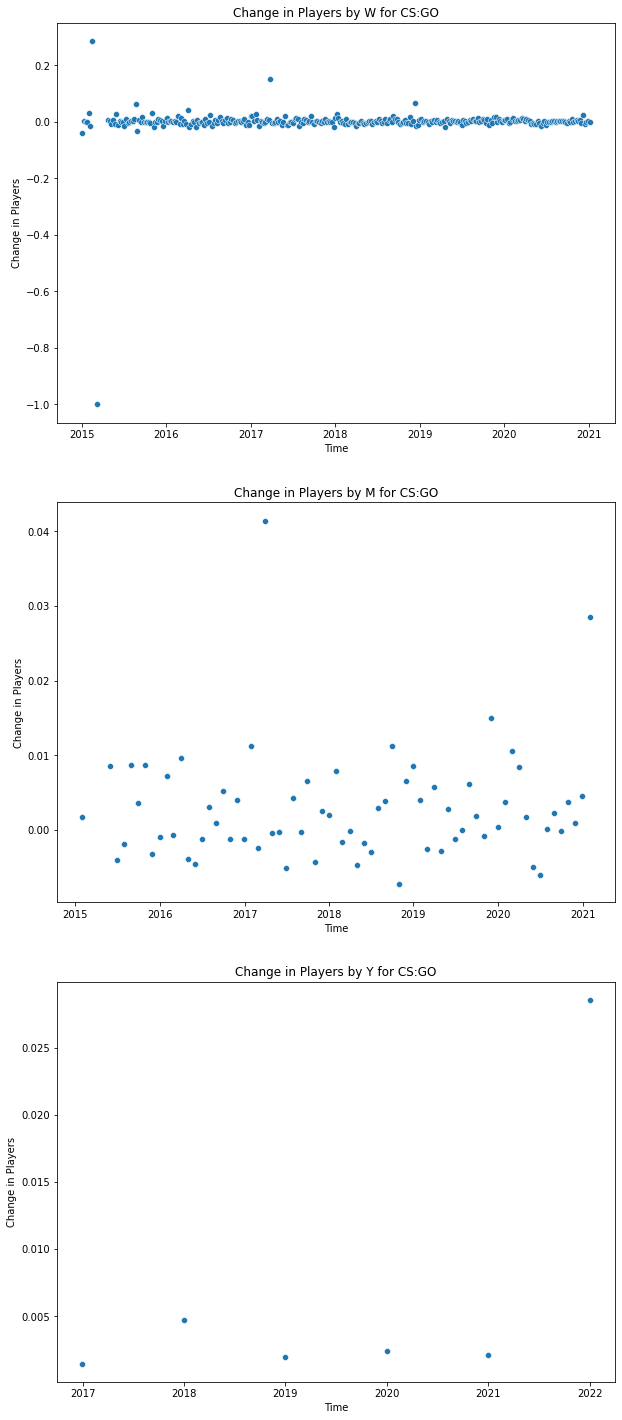

In [153]:
# expanding those graphs that have outliers, suggesting that these are our maximums. These graphs are [0,0], [0, 1], and 
# [0, 2] which are all 'csgo'. Why does this game have such random growth compared to other games?

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10, 25))

df = ls[0]

for x, t in enumerate(times):
    df_plot = df.groupby(pd.Grouper(level = 'DateTime', freq = t)).mean()
    ax = sns.scatterplot(data = df_plot, x = 'DateTime', y = '%chg_players', ax = axes[x])
    ax.set(title = 'Change in Players by ' + t + ' for CS:GO', xlabel = 'Time', ylabel = 'Change in Players')
    

From our above visualizations, it appears that CSGO had the single largest change in player base halfway through 2012.




### 3. Is there a similar trend in the change in players across all games? If not, what does this suggest?

We will compare the changes in player counts that can be attributed to trends, such as more players being online during a weekend, or a particular time of year. We can find the correlation between players or % change in players.

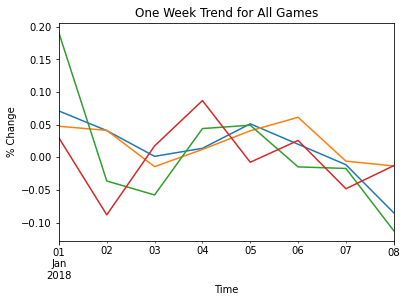

In [154]:
for i, df in enumerate(ls):
    
    df['%chg_players']["2018-01-01":"2018-01-08"].plot(label = labels[i], title = "One Week Trend for All Games",
                                                      xlabel = 'Time', ylabel = '% Change')

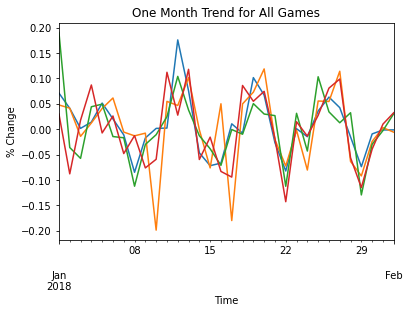

In [155]:
for i, df in enumerate(ls):
    
    df['%chg_players']["2018-01-01":"2018-02-01"].plot(label = labels[i], title = "One Month Trend for All Games",
                                                      xlabel = 'Time', ylabel = '% Change')

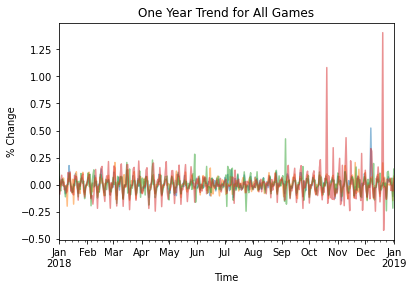

In [156]:
for i, df in enumerate(ls):
    
    df['%chg_players']["2018-01-01":"2019-01-01"].plot(label = labels[i], title = "One Year Trend for All Games",
                                                      xlabel = 'Time', ylabel = '% Change', alpha = 0.5)

### 4. How does a larger player base impact volitility in number of players? 


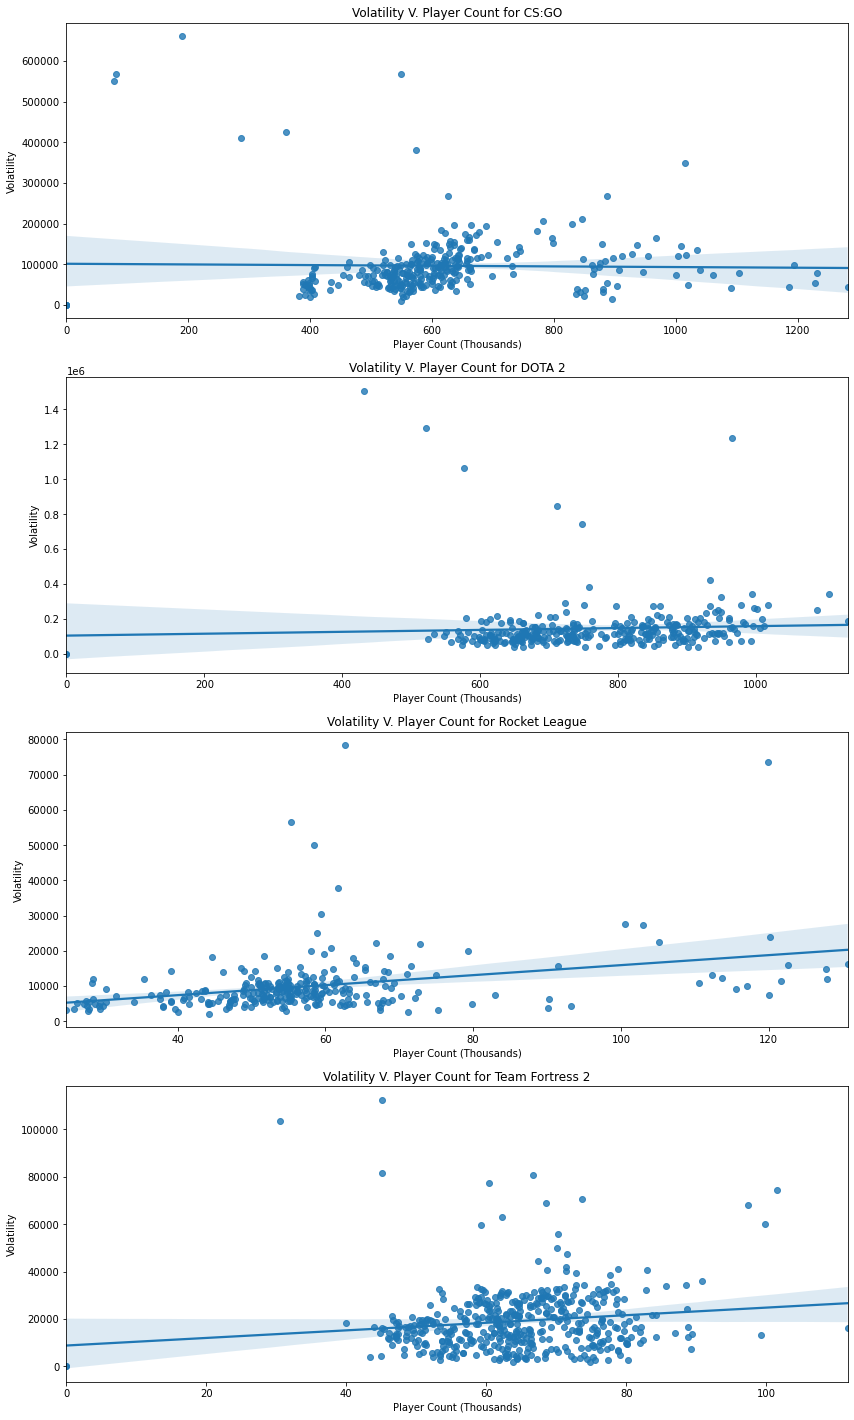

In [166]:
volatilities = []

fig, axes = plt.subplots(ncols = 1, nrows = 4, figsize = (14, 25))

for x, df in enumerate(ls):
    
    vars_df = df.groupby(pd.Grouper(level = "DateTime", freq = "W")).var()
    vol=(vars_df['players']**0.5)*(7**0.5)

    df_plot = df.groupby(pd.Grouper(level = 'DateTime', freq = 'W')).mean()
    

    ax = sns.regplot(x = df_plot['players']/1000, y = vol, ax = axes[x])
    ax.set_ylabel('Volatility')
    ax.set(title = "Volatility V. Player Count for " + game_labels[x], xlabel = "Player Count (Thousands)")

### 5. How are number of players and number of viewers distributed among our games?
We expect players to be normally distributed, while viewers may have a less normal distribution. 

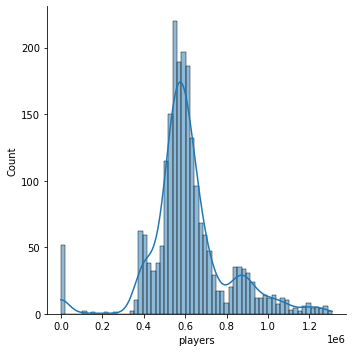

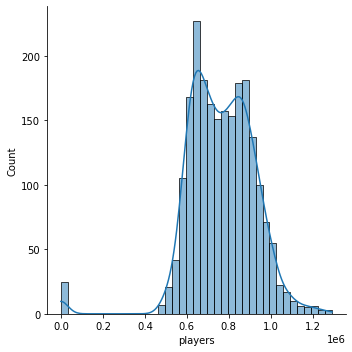

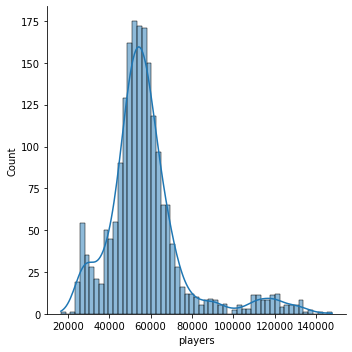

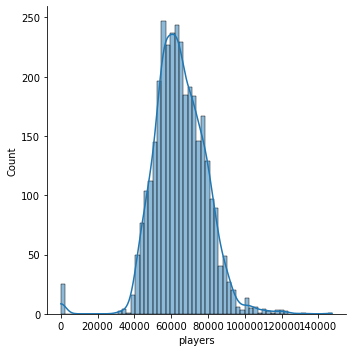

In [158]:
for df in ls:
    sns.displot(df['players'], kde = True)

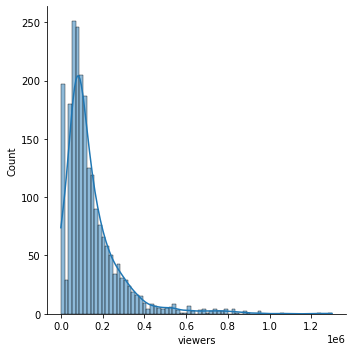

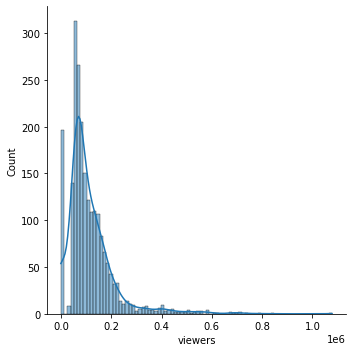

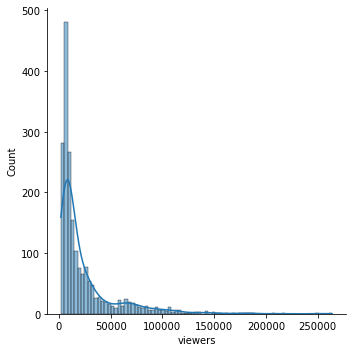

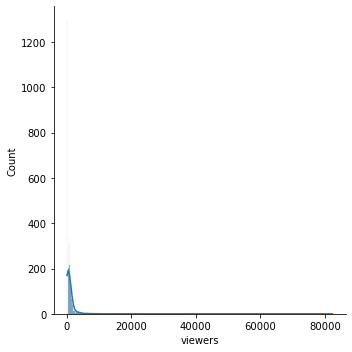

In [159]:
for df in ls:
    sns.displot(df['viewers'], kde = True)

### 6. How does an event affect number of players?
We will compare average number of players during an event versus other times. 

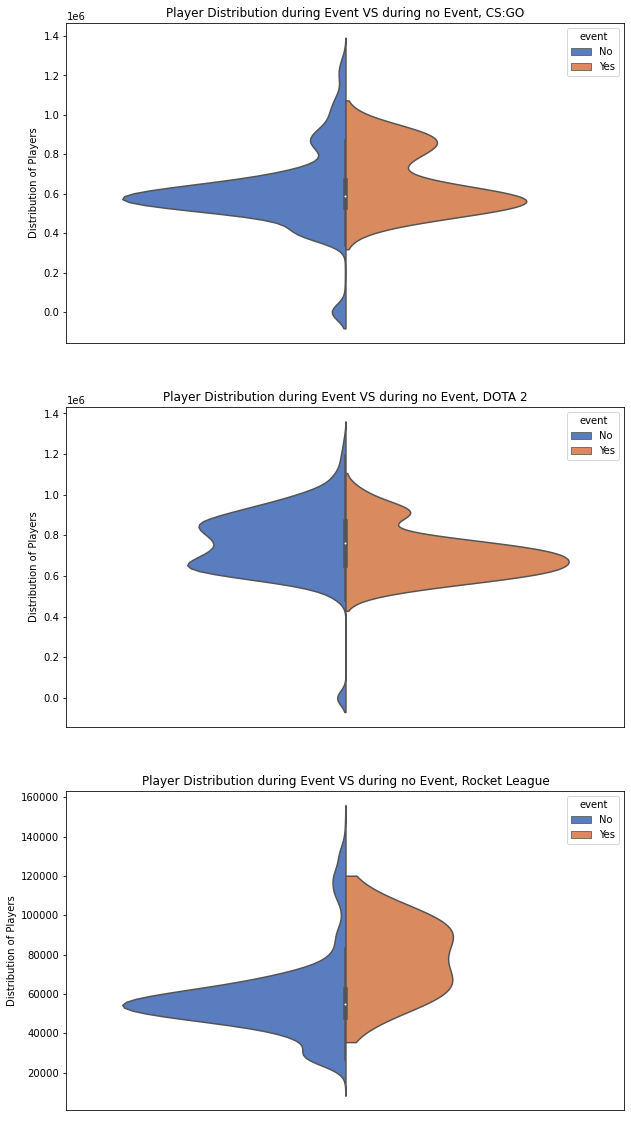

In [162]:
# a violin plot would compare counts during vs outside of events. 

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10, 20))

for n, df in enumerate(ls[0:3]):
    
    
    df['all'] = ''
    
    ax = sns.violinplot(x = 'all', y="players", hue = df["event"],
                    data=df, palette="muted", split=True, ax = axes[n])
    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_ylabel("Distribution of Players")
    ax.set_title('Player Distribution during Event VS during no Event, '+ labels[n])
    
# this code is unable to violin plot Team Fortress 2 because this game does not have
# events, as detailed in our introduction. 

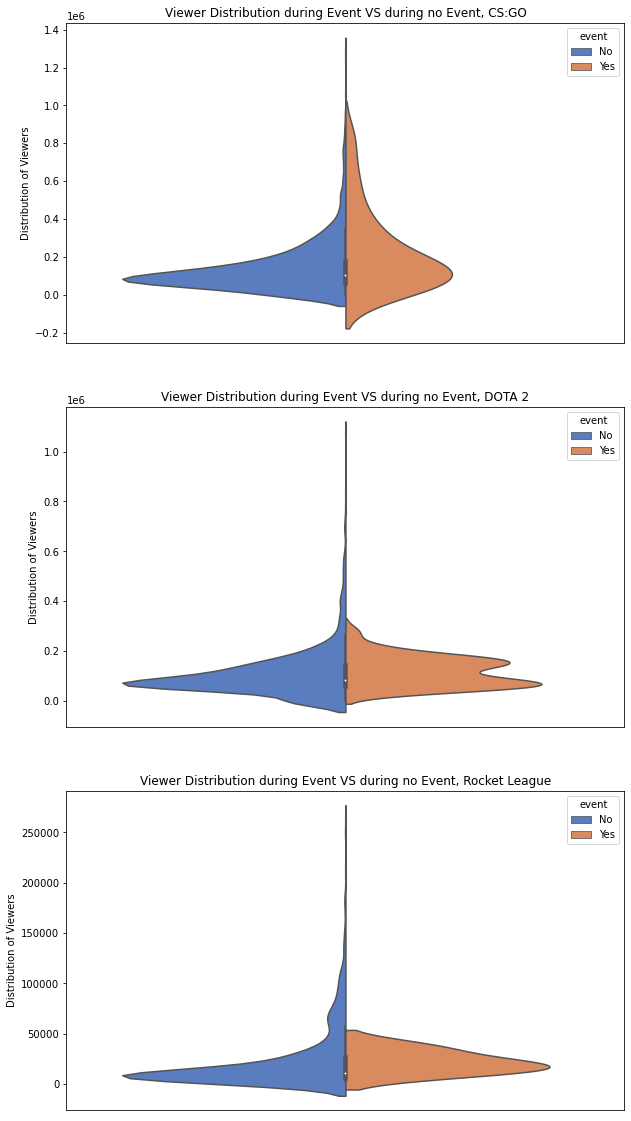

In [163]:
# and how does event affect viewers? Expected more than players

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10, 20))

for n, df in enumerate(ls[0:3]):
    
    
    df['all'] = ''
    
    ax = sns.violinplot(x = 'all', y="viewers", hue = df["event"],
                    data=df, palette="muted", split=True, ax = axes[n])
    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_ylabel("Distribution of Viewers")
    ax.set_title('Viewer Distribution during Event VS during no Event, '+ labels[n])
    